<a href="https://colab.research.google.com/github/alexis1199/ESTADISTICA/blob/main/PROBLEMARIO_U5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


# a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.
 Este experimento busca contrastar la eficacia de tres marcas de atomizadores para eliminar moscas, incorporando la variación debida tanto al producto como al día en que se aplicó. Bajo la hipótesis nula se supone que las tres marcas producen el mismo porcentaje medio de moscas muertas, por lo que cualquier diferencia observada se atribuiría solo al error experimental. Al incluir los días como bloques se examina, además, si las condiciones asociadas a cada jornada modifican significativamente los resultados, independientemente del atomizador empleado.

In [ ]:
import pandas as pd
from io import StringIO

data = '''
Marca,Replica,Resultado
1,1,72
2,1,55
3,1,64
1,2,65
2,2,59
3,2,74
1,3,67
2,3,68
3,3,61
1,4,75
2,4,70
3,4,58
1,5,62
2,5,53
3,5,51
1,6,73
2,6,50
3,6,69
'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Marca,Replica,Resultado
0,1,1,72
1,2,1,55
2,3,1,64
3,1,2,65
4,2,2,59
5,3,2,74
6,1,3,67
7,2,3,68
8,3,3,61
9,1,4,75


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Replica'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'Resultado' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

    #BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
                sum_sq    df         F    PR(>F)
C(Marca)    296.333333   2.0  2.880752  0.102804
C(Replica)  281.333333   5.0  1.093973  0.420718
Residual    514.333333  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


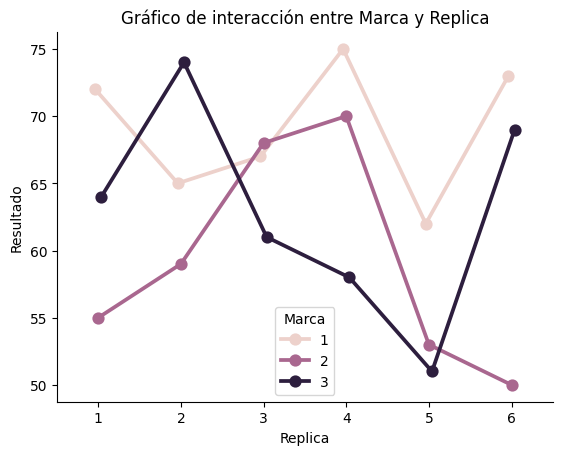

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

# BRIAN ALEXIS VILLALOBOS DE LOERA

# b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?
No existe diferencia significativa ya que el valor p= 0.102

# c) ¿Hay algún atomizador mejor? Argumente su respuesta.
Al no haber una direncia significativa entre marcas, no se puede asegurar si algun atomizador es mejor que otro

In [ ]:
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Marca'] == 1]['Resultado'], "Marca 1", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 2]['Resultado'], "Marca 2", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 3]['Resultado'], "Marca 3", nivel_de_significancia)

# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Marca 1:
Estadístico: 0.9385
Valor p: 0.6471
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 2:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 3:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Marca'] == 1]['Resultado'],
    df[df['Marca'] == 2]['Resultado'],
    df[df['Marca'] == 3]['Resultado'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 2.563987653883703
Valor p: 0.2774834944728171
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


# a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?
Factor de tratamiento: Silo
Porque queremos comparar si hay diferencias en la temperatura entre los distintos silos.

Factor de bloque: Día
Porque la variación entre días puede afectar la temperatura, pero no es el foco del estudio, por lo que se bloquea para controlar su efecto.

In [ ]:
import pandas as pd
from io import StringIO
data = '''
Silo,Dia,Temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''
df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Silo,Dia,Temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0



# b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.
En este experimento se aplicó un Diseño en Bloques Completos al Azar (DBCA) con el objetivo de analizar si existen diferencias significativas en la temperatura promedio entre distintos silos utilizados para almacenar leche. Para ello, se consideraron como tratamientos los diferentes silos y como bloques los días en los que se realizaron las mediciones, ya que estos representan una fuente de variabilidad que se desea controlar. Bajo este esquema, se planteó como hipótesis nula que no existen diferencias significativas en la temperatura promedio entre los silos, es decir, todos los silos mantienen condiciones similares de almacenamiento. La hipótesis alternativa propone que al menos uno de los silos presenta una temperatura distinta. De igual forma, respecto a los bloques, la hipótesis nula establece que no hay diferencias entre los días en que se realizó el experimento, mientras que la alternativa indica que al menos un día tuvo un comportamiento diferente en cuanto a la temperatura registrada. Estas hipótesis permiten evaluar si la variación observada en las mediciones puede atribuirse al efecto de los tratamientos (silos), a los bloques (días) o simplemente a la variabilidad aleatoria.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Temperatura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
          sum_sq    df         F    PR(>F)
C(Silo)     4.46   4.0  0.690402  0.609212
C(Dia)      9.76   4.0  1.510836  0.246022
Residual   25.84  16.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


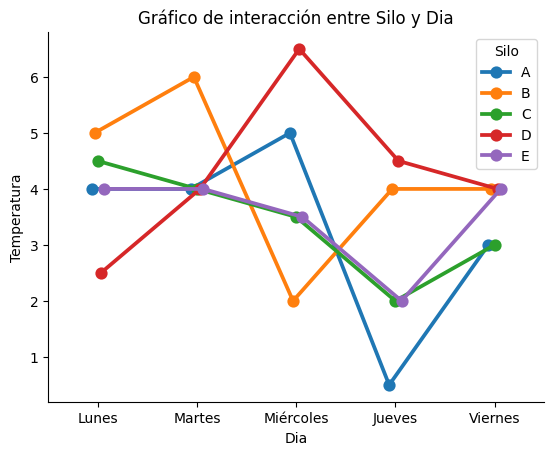

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()
#BRIAN ALEXIS VILLALOBOS DE LOERA

# c) ¿Hay diferencia entre los silos?
Se concluye que no hay diferencias significativas entre los silos en cuanto a la temperatura promedio registrada. Esto sugiere que, estadísticamente, todos los silos presentan un comportamiento similar en relación con la variable medida

# d) ¿La temperatura de un día a otro es diferente?
se concluye que no hay diferencias significativas en la temperatura promedio entre los distintos días del experimento. Esto indica que la variación diaria no tuvo un efecto estadísticamente relevante en las mediciones de temperatura de los silos.

# e) Revise residuos, ¿hay algún problema evidente?
No se observan problemas graves con los residuos, ya que se cumple el supuesto de igualdad de varianzas y la normalidad se cumple en la mayoría de los grupos. El único posible problema es que los datos del Silo E no presentan normalidad, lo que podría influir ligeramente en la validez de los resultados, aunque ANOVA es relativamente robusto a pequeñas desviaciones de normalidad si las varianzas son homogéneas y el tamaño de muestra es parejo

In [ ]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Silo'] == "A"]['Temperatura'], "Silo A", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "B"]['Temperatura'], "Silo B", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "C"]['Temperatura'], "Silo C", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "D"]['Temperatura'], "Silo D", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "E"]['Temperatura'], "Silo E", nivel_de_significancia)
#BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Silo A:
Estadístico: 0.8854
Valor p: 0.3344
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo B:
Estadístico: 0.9556
Valor p: 0.7773
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo C:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo D:
Estadístico: 0.9306
Valor p: 0.6006
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo E:
Estadístico: 0.7008
Valor p: 0.0098
Interpretación: Los datos no tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Silo'] == "A"]['Temperatura'],
    df[df['Silo'] == "B"]['Temperatura'],
    df[df['Silo'] == "C"]['Temperatura'],
    df[df['Silo'] == "D"]['Temperatura'],
    df[df['Silo'] == "E"]['Temperatura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 2.3581336401556414
Valor p: 0.6702060348913189
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



# a) Señale el nombre del diseño experimental utilizado.
El diseño experimental utilizado es un Diseño en Bloques Completos al Azar (DBCA)

# b) Formule la hipótesis que se quiere probar en este problema.
En este estudio, se busca determinar si cuatro detergentes tienen el mismo rendimiento en términos de blancura después del lavado. La hipótesis inicial es que todos tienen el mismo efecto, pero el objetivo es comprobar si esto es cierto o si alguno destaca por ser mejor o peor que los demás. Esto ayudará a entender si el tipo de detergente realmente influye en la calidad del lavado.

# c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.

In [ ]:
import pandas as pd
from io import StringIO
data = '''
Detergente,Lavadora,Blancura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49
'''
df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Detergente,Lavadora,Blancura
0,A,1,45
1,A,2,43
2,A,3,51
3,B,1,47
4,B,2,44
5,B,3,52
6,C,1,50
7,C,2,49
8,C,3,57
9,D,1,42


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Blancura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
                   sum_sq   df          F    PR(>F)
C(Detergente)  133.666667  3.0  34.127660  0.000363
C(Lavadora)    170.166667  2.0  65.170213  0.000085
Residual         7.833333  6.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


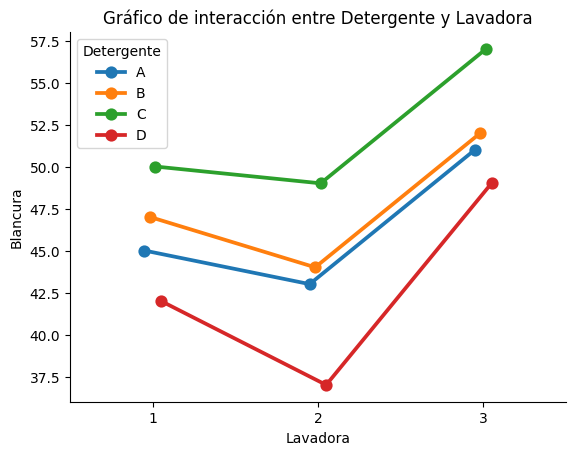

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()
#BRIAN ALEXIS VILLALOBOS DE LOERA

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

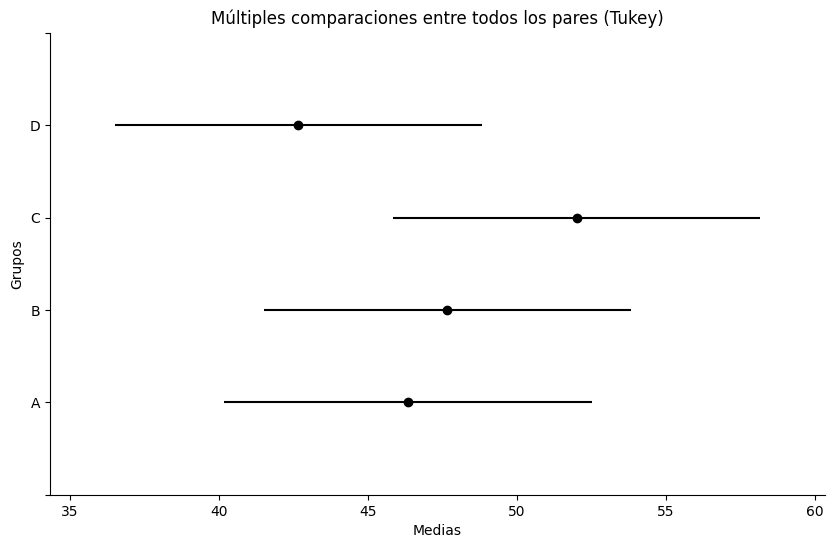

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Blancura'], groups=df['Detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#BRIAN ALEXIS VILLALOBOS DE LOERA

In [ ]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Detergente'] == "A"]['Blancura'], "Detergente A", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "B"]['Blancura'], "Detergente B", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "C"]['Blancura'], "Detergente C", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "D"]['Blancura'], "Detergente D", nivel_de_significancia)
#BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Detergente A:
Estadístico: 0.9231
Valor p: 0.4633
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente B:
Estadístico: 0.9796
Valor p: 0.7262
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente C:
Estadístico: 0.8421
Valor p: 0.2196
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente D:
Estadístico: 0.9908
Valor p: 0.8168
Interpretación: Los datos tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Detergente'] == "A"]['Blancura'],
    df[df['Detergente'] == "B"]['Blancura'],
    df[df['Detergente'] == "C"]['Blancura'],
    df[df['Detergente'] == "D"]['Blancura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 2.766766945554789
Valor p: 0.4289999281632636
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


# CONCLUSION
Los resultados muestran que el tipo de detergente sí afecta la blancura del lavado de manera significativa. No es casualidad que algunos detergentes funcionen mejor que otros, y al menos uno se destaca. Además, el modelo de lavadora también influye en el resultado, por lo que es importante considerarlo. Lo siguiente sería comparar los detergentes entre sí para ver cuál ofrece los mejores resultados.

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

# a) Señale el nombre del diseño experimental utilizado
El experimento es un diseño completamente al azar (DCA), donde el único factor considerado es el tipo de detergente.

# b) Formule la hipótesis que se quiere probar en este problema.
Se parte de la idea de que los cuatro detergentes tienen un rendimiento similar en cuanto a blancura. Se supone que cualquier diferencia en los resultados se debe a variaciones aleatorias en el proceso de lavado. El objetivo es ver si el tipo de detergente realmente influye en la blancura o si todos funcionan de manera equivalente.

# c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.

In [ ]:
import pandas as pd
from io import StringIO
data = '''
Detergente,Blancura
A,45
A,43
A,51
B,47
B,44
B,52
C,50
C,49
C,57
D,42
D,37
D,49
'''
df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Detergente,Blancura
0,A,45
1,A,43
2,A,51
3,B,47
4,B,44
5,B,52
6,C,50
7,C,49
8,C,57
9,D,42


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Blancura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")
#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
                   sum_sq   df         F   PR(>F)
C(Detergente)  133.666667  3.0  2.002497  0.19229
Residual       178.000000  8.0       NaN      NaN

Conclusión: No hay diferencias significativas entre los tratamientos.


# CONCLUSION
El análisis estadístico mostró que no hay suficiente evidencia para decir que los detergentes tienen efectos diferentes en la blancura de la ropa. Dado que las diferencias observadas podrían ser solo variaciones aleatorias, se concluye que todos los detergentes son igualmente efectivos en este aspecto. En otras palabras, el tipo de detergente no parece influir de manera clara en el resultado.

# b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.
Si , la diferencia clave está en cómo se consideran las lavadoras en el análisis. Cuando se controla su efecto, se detectan diferencias significativas entre los detergentes, lo que sugiere que al menos uno funciona distinto. Pero si se ignora el efecto de las lavadoras, el análisis no encuentra diferencias importantes entre los detergentes. Esto sucede porque al no controlar las lavadoras, su variabilidad se mezcla con el error experimental, lo que dificulta detectar las diferencias reales entre los detergentes. Así que las conclusiones cambian según si se considera o no el impacto de las lavadoras.

# c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


# a) Plantee el modelo y las hipótesis más adecuadas al problema.
Modelo estadístico:

Dado que se comparan dos equipos (factor principal) y los operadores se consideran como bloques, el modelo es un Diseño en Bloques Completamente al Azar (DBCA), con un factor fijo (Equipo) y bloque fijo (Operador).

# HIPOTESIS
El experimento busca comparar dos equipos que miden un ángulo crítico, viendo si las diferencias en las mediciones se deben al equipo o a los operadores que los usan. Los operadores se incluyen como factor de control para ver si influyen en los resultados y así poder evaluar con más precisión si los equipos funcionan de manera similar o diferente.

# b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.

In [ ]:
import pandas as pd
from io import StringIO
data = '''
Equipo,Operador,Medicion
1,1,1.328
1,1,0.985
1,1,1.316
1,1,1.553
1,1,1.310
1,1,1.113
1,1,1.057
1,1,1.144
1,1,1.485
1,1,1.386
1,2,1.269
1,2,1.268
1,2,1.091
1,2,1.195
1,2,1.380
1,2,1.036
1,2,0.783
1,2,1.108
1,2,1.129
1,2,1.132
1,3,1.440
1,3,1.079
1,3,1.389
1,3,1.611
1,3,1.445
1,3,1.150
1,3,1.190
1,3,1.247
1,3,1.617
1,3,1.574
2,1,1.273
2,1,0.985
2,1,1.134
2,1,1.412
2,1,0.917
2,1,0.789
2,1,0.671
2,1,0.554
2,1,1.386
2,1,1.289
2,2,1.036
2,2,0.783
2,2,1.108
2,2,1.129
2,2,1.132
2,2,0.201
2,2,0.900
2,2,0.916
2,2,1.434
2,2,1.223
2,3,1.454
2,3,1.063
2,3,1.219
2,3,1.602
2,3,1.583
2,3,1.018
2,3,1.050
2,3,0.997
2,3,1.538
2,3,1.478
'''
df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Equipo,Operador,Medicion
0,1,1,1.328
1,1,1,0.985
2,1,1,1.316
3,1,1,1.553
4,1,1,1.310
5,1,1,1.113
6,1,1,1.057
7,1,1,1.144
8,1,1,1.485
9,1,1,1.386


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Medicion' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
               sum_sq    df         F    PR(>F)
C(Equipo)    0.342922   1.0  5.711701  0.020242
C(Operador)  0.781471   2.0  6.508092  0.002875
Residual     3.362153  56.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


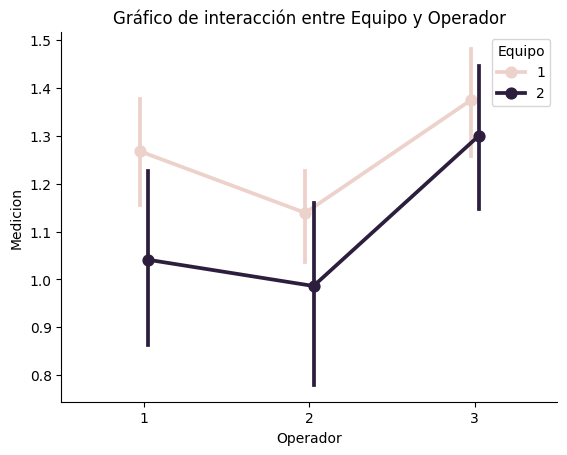

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()
#BRIAN ALEXIS VILLALOBOS DE LOERA

# ARGUMENTO ESTADISTICO

# c) ¿Existen diferencias entre los operadores?

sí existen diferencias significativas entre los operadores

# d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.

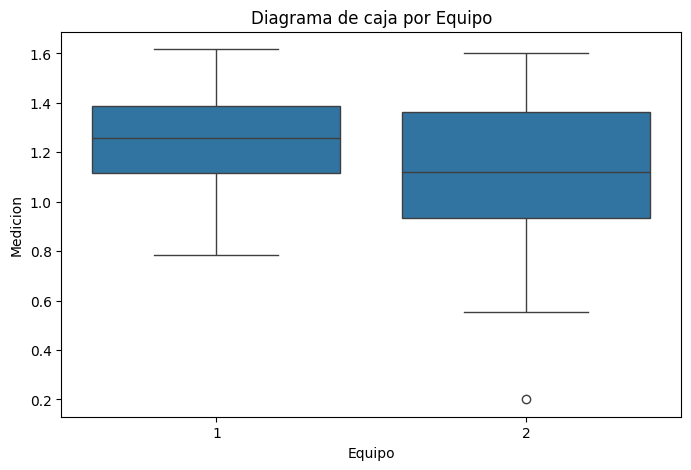

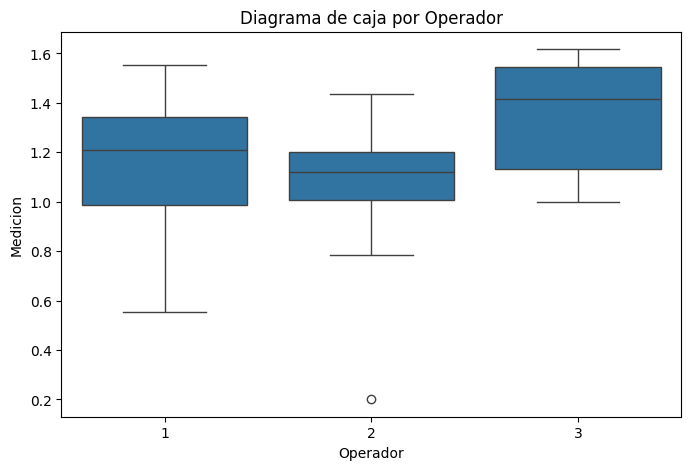

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja por equipo
plt.figure(figsize=(8,5))
sns.boxplot(x='Equipo', y='Medicion', data=df)
plt.title('Diagrama de caja por Equipo')
plt.show()

# Diagrama de caja por operador
plt.figure(figsize=(8,5))
sns.boxplot(x='Operador', y='Medicion', data=df)
plt.title('Diagrama de caja por Operador')
plt.show()
#BRIAN ALEXIS VILLALOBOS DE LOERA

<ipython-input-23-5f7fdfca9d53>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)
<ipython-input-23-5f7fdfca9d53>:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)


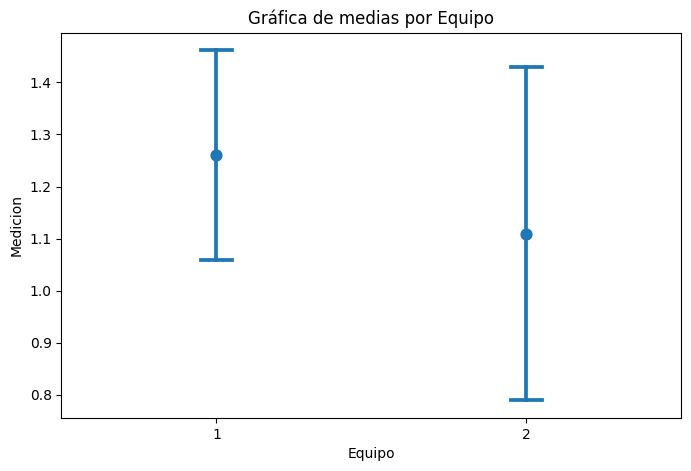

<ipython-input-23-5f7fdfca9d53>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)
<ipython-input-23-5f7fdfca9d53>:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)


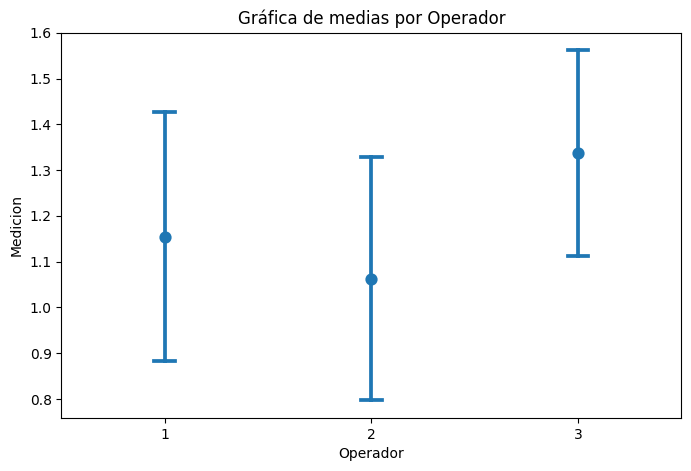

In [ ]:

# Gráfica de medias por equipo
plt.figure(figsize=(8,5))
sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)
plt.title('Gráfica de medias por Equipo')
plt.show()

# Gráfica de medias por operador
plt.figure(figsize=(8,5))
sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)
plt.title('Gráfica de medias por Operador')
plt.show()
#BRIAN ALEXIS VILLALOBOS DE LOERA

# e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.

In [ ]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Equipo'] == 1]['Medicion'], "Equipo 1", nivel_de_significancia)
prueba_shapiro(df[df['Equipo'] == 2]['Medicion'], "Equipo 2", nivel_de_significancia)
#BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Equipo 1:
Estadístico: 0.9726
Valor p: 0.6111
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Equipo 2:
Estadístico: 0.9602
Valor p: 0.3129
Interpretación: Los datos tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Equipo'] == 1]['Medicion'],
    df[df['Equipo'] == 2]['Medicion'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 5.861857628615241
Valor p: 0.015472455921016526
Rechazamos la hipótesis nula: Las varianzas no son iguales.


## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


# a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).
Al comparar los termómetros electrónicos con los de mercurio, se observa que los electrónicos dan lecturas muy variables y, en algunos casos, poco creíbles, como números negativos o valores muy alejados de lo esperado. Esto sugiere que los termómetros electrónicos podrían no ser confiables o que necesitan calibración.

# b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.

In [ ]:
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,2.6
A,Día 2,2.8
A,Día 3,5.0
A,Día 4,0.0
A,Día 5,2.4
B,Día 1,6.4
B,Día 2,6.4
B,Día 3,2.3
B,Día 4,4.2
B,Día 5,4.0
C,Día 1,3.3
C,Día 2,1.4
C,Día 3,1.8
C,Día 4,-1.9
C,Día 5,-7.6
D,Día 1,3.1
D,Día 2,5.0
D,Día 3,6.6
D,Día 4,2.7
D,Día 5,4.0
E,Día 1,0.0
E,Día 2,3.5
E,Día 3,2.0
E,Día 4,-4.0
E,Día 5,-6.3

'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Silo,Dia,Valor
0,A,Día 1,2.6
1,A,Día 2,2.8
2,A,Día 3,5.0
3,A,Día 4,0.0
4,A,Día 5,2.4
5,B,Día 1,6.4
6,B,Día 2,6.4
7,B,Día 3,2.3
8,B,Día 4,4.2
9,B,Día 5,4.0


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
            sum_sq    df         F    PR(>F)
C(Silo)   140.5424   4.0  6.189550  0.003304
C(Dia)     86.8984   4.0  3.827044  0.022852
Residual   90.8256  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


# CONCLUSION
El análisis muestra que hay diferencias significativas en las temperaturas medidas con el termómetro electrónico entre los distintos silos y también entre los días de medición. Esto indica que tanto el silo como el día influyen en las lecturas, lo que justifica usar un diseño en bloques para controlar estas variaciones y obtener resultados más precisos. Sin embargo, debido a la variabilidad en algunas mediciones electrónicas, es posible que los termómetros no sean del todo confiables o precisos, lo que podría afectar los resultados.

# c) Repita el inciso anterior pero ahora para las mediciones Mer.

In [ ]:
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,4.0
A,Día 2,4.0
A,Día 3,5.0
A,Día 4,0.5
A,Día 5,3.0
B,Día 1,5.0
B,Día 2,6.0
B,Día 3,2.0
B,Día 4,4.0
B,Día 5,4.0
C,Día 1,4.5
C,Día 2,4.0
C,Día 3,3.5
C,Día 4,2.0
C,Día 5,3.0
D,Día 1,2.5
D,Día 2,4.0
D,Día 3,6.5
D,Día 4,4.5
D,Día 5,4.0
E,Día 1,4.0
E,Día 2,4.0
E,Día 3,0.6
E,Día 4,-4.0
E,Día 5,-4.0

'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Silo,Dia,Valor
0,A,Día 1,4.0
1,A,Día 2,4.0
2,A,Día 3,5.0
3,A,Día 4,0.5
4,A,Día 5,3.0
5,B,Día 1,5.0
6,B,Día 2,6.0
7,B,Día 3,2.0
8,B,Día 4,4.0
9,B,Día 5,4.0


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
    #BRIAN ALEXIS VILLALOBOS DE LOERSA

Resultados del ANOVA:
           sum_sq    df         F    PR(>F)
C(Silo)   58.2696   4.0  3.697403  0.025752
C(Dia)    33.8496   4.0  2.147872  0.121867
Residual  63.0384  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


# CONCLUSION
El análisis de varianza con termómetros de mercurio muestra diferencias significativas en las temperaturas entre los silos, lo que indica que cada silo tiene una temperatura distinta. Sin embargo, no se encontraron diferencias significativas entre los días de medición, lo que sugiere que las lecturas con mercurio son más estables y no varían mucho con el tiempo. En resumen, las diferencias en temperatura se deben principalmente al silo y no tanto al día de medición.

# d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.

Ambos métodos, termómetros de mercurio y electrónicos, coinciden en que hay diferencias de temperatura entre los silos. Sin embargo, las mediciones electrónicas muestran variaciones significativas entre días, mientras que las de mercurio son más estables. Esto sugiere que los termómetros electrónicos son más sensibles a factores externos y menos confiables para un monitoreo preciso a lo largo del tiempo, en comparación con los termómetros de mercurio, que ofrecen mediciones más consistentes.

# e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.

In [ ]:
import pandas as pd
from io import StringIO
data = '''
Silo,Día,Categoría,Valor
A,Día 1,Mer,4.0
A,Día 1,Rtd,2.6
A,Día 2,Mer,4.0
A,Día 2,Rtd,2.8
A,Día 3,Mer,5.0
A,Día 3,Rtd,5.0
A,Día 4,Mer,0.5
A,Día 4,Rtd,0.0
A,Día 5,Mer,3.0
A,Día 5,Rtd,2.4
B,Día 1,Mer,5.0
B,Día 1,Rtd,6.4
B,Día 2,Mer,6.0
B,Día 2,Rtd,6.4
B,Día 3,Mer,2.0
B,Día 3,Rtd,2.3
B,Día 4,Mer,4.0
B,Día 4,Rtd,4.2
B,Día 5,Mer,4.0
B,Día 5,Rtd,4.0
C,Día 1,Mer,4.5
C,Día 1,Rtd,3.3
C,Día 2,Mer,4.0
C,Día 2,Rtd,1.4
C,Día 3,Mer,3.5
C,Día 3,Rtd,1.8
C,Día 4,Mer,2.0
C,Día 4,Rtd,-1.9
C,Día 5,Mer,3.0
C,Día 5,Rtd,-7.6
D,Día 1,Mer,2.5
D,Día 1,Rtd,3.1
D,Día 2,Mer,4.0
D,Día 2,Rtd,5.0
D,Día 3,Mer,6.5
D,Día 3,Rtd,6.6
D,Día 4,Mer,4.5
D,Día 4,Rtd,2.7
D,Día 5,Mer,4.0
D,Día 5,Rtd,4.0
E,Día 1,Mer,4.0
E,Día 1,Rtd,0.0
E,Día 2,Mer,4.0
E,Día 2,Rtd,3.5
E,Día 3,Mer,0.6
E,Día 3,Rtd,2.0
E,Día 4,Mer,-4.0
E,Día 4,Rtd,-4.0
E,Día 5,Mer,-4.0
E,Día 5,Rtd,-6.3
'''
df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Silo,Día,Categoría,Valor
0,A,Día 1,Mer,4.0
1,A,Día 1,Rtd,2.6
2,A,Día 2,Mer,4.0
3,A,Día 2,Rtd,2.8
4,A,Día 3,Mer,5.0
5,A,Día 3,Rtd,5.0
6,A,Día 4,Mer,0.5
7,A,Día 4,Rtd,0.0
8,A,Día 5,Mer,3.0
9,A,Día 5,Rtd,2.4


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Silo'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA


Resultados del ANOVA para el Cuadro Latino:
                sum_sq    df         F    PR(>F)
C(Categoría)   14.4722   1.0  2.976019  0.092227
C(Silo)       168.4692   4.0  8.660872  0.000039
C(Día)        110.4372   4.0  5.677491  0.001025
Residual      194.5176  40.0       NaN       NaN

Conclusión: No hay diferencias significativas: Categoría.
Conclusión: Hay diferencias significativas: Silo.
Conclusión: Hay diferencias significativas: Día.


# CONCLUSIONES

Aunque los termómetros de mercurio y electrónicos no dan lecturas idénticas, el análisis muestra que no hay diferencias significativas entre ellos, lo que sugiere que ambos tipos de termómetros son comparables en este experimento. Sin embargo, sí se encontraron diferencias importantes en la temperatura entre los silos y los días, lo que indica que estas variables influyen más en los resultados que el tipo de termómetro usado. Esto sugiere que los termómetros electrónicos podrían ser una buena alternativa a los de mercurio.

## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [ ]:
data = '''
Lote,Día,Categoría,Valor
1,Día 1,A,8
1,Día 2,B,7
1,Día 3,D,1
1,Día 4,C,7
1,Día 5,E,3
2,Día 1,C,11
2,Día 2,E,2
2,Día 3,A,7
2,Día 4,D,3
2,Día 5,B,8
3,Día 1,B,4
3,Día 2,A,9
3,Día 3,C,10
3,Día 4,E,1
3,Día 5,D,5
4,Día 1,D,6
4,Día 2,C,8
4,Día 3,E,6
4,Día 4,B,6
4,Día 5,A,10
5,Día 1,E,4
5,Día 2,D,2
5,Día 3,B,3
5,Día 4,A,8
5,Día 5,C,8
'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Lote,Día,Categoría,Valor
0,1,Día 1,A,8
1,1,Día 2,B,7
2,1,Día 3,D,1
3,1,Día 4,C,7
4,1,Día 5,E,3
5,2,Día 1,C,11
6,2,Día 2,E,2
7,2,Día 3,A,7
8,2,Día 4,D,3
9,2,Día 5,B,8


# a) ¿Cómo se aleatorizó el experimento?

El diseño utilizado es un cuadro latino 5x5, donde se estudian cinco catalizadores (A, B, C, D y E) controlando dos fuentes de variabilidad: lotes de material y días. Cada catalizador aparece una sola vez en cada lote y cada día, lo que permite aislar el efecto de los tratamientos (catalizadores) sin que se confunda con la variabilidad de los lotes o los días. Esto hace que las comparaciones entre catalizadores sean más precisas y confiables.

# b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Lote'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA para el Cuadro Latino:
              sum_sq    df          F    PR(>F)
C(Categoría)  141.44   4.0  11.309168  0.000488
C(Lote)        15.44   4.0   1.234542  0.347618
C(Día)         12.24   4.0   0.978678  0.455014
Residual       37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Lote.
Conclusión: No hay diferencias significativas: Día.


# HIPOTESIS

Las hipótesis planteadas son:

1. Tratamientos (catalizadores): No hay diferencias en el tiempo de reacción entre los catalizadores.
2. Bloques por lote: No hay variación en el tiempo de reacción asociada a los lotes de material.
3. Bloques por día: No hay diferencias en el tiempo de reacción asociadas al día de la prueba.

El análisis busca comprobar si estas hipótesis se cumplen o si existen diferencias significativas en el tiempo de reacción debidas a los catalizadores, lotes o días.

# c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?

Si existen diferencias significativas entre los cinco catalizadores en cuanto al tiempo de reacción. Esto quiere decir que no todos los catalizadores tienen el mismo efecto y al menos uno provoca un cambio real en el tiempo de reacción del proceso.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

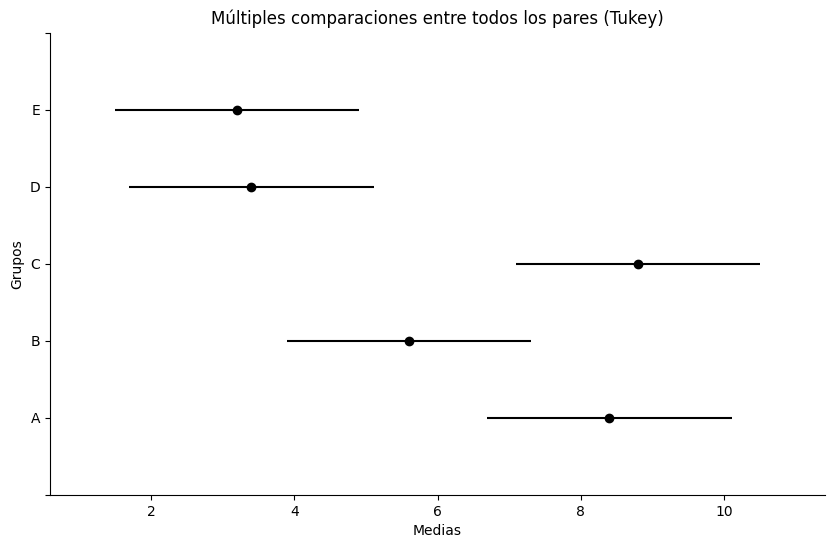

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Categoría'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

# d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?

El análisis ANOVA muestra que los factores de bloqueo (lotes y días) no tienen un efecto significativo en el tiempo de reacción. Esto indica que las variaciones entre lotes y días no influyeron en los resultados, lo que permite atribuir las diferencias en el tiempo de reacción principalmente al efecto de los catalizadores. El diseño en cuadro latino fue efectivo para controlar estas variables externas y aislar el efecto de los tratamientos.

# e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?

<ipython-input-35-623ba00d08a8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Categoría", y="Valor", estimator=np.mean, ci=None)
<ipython-input-35-623ba00d08a8>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
<ipython-input-35-623ba00d08a8>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Día", y="Valor", estimator=np.mean, ci=None)


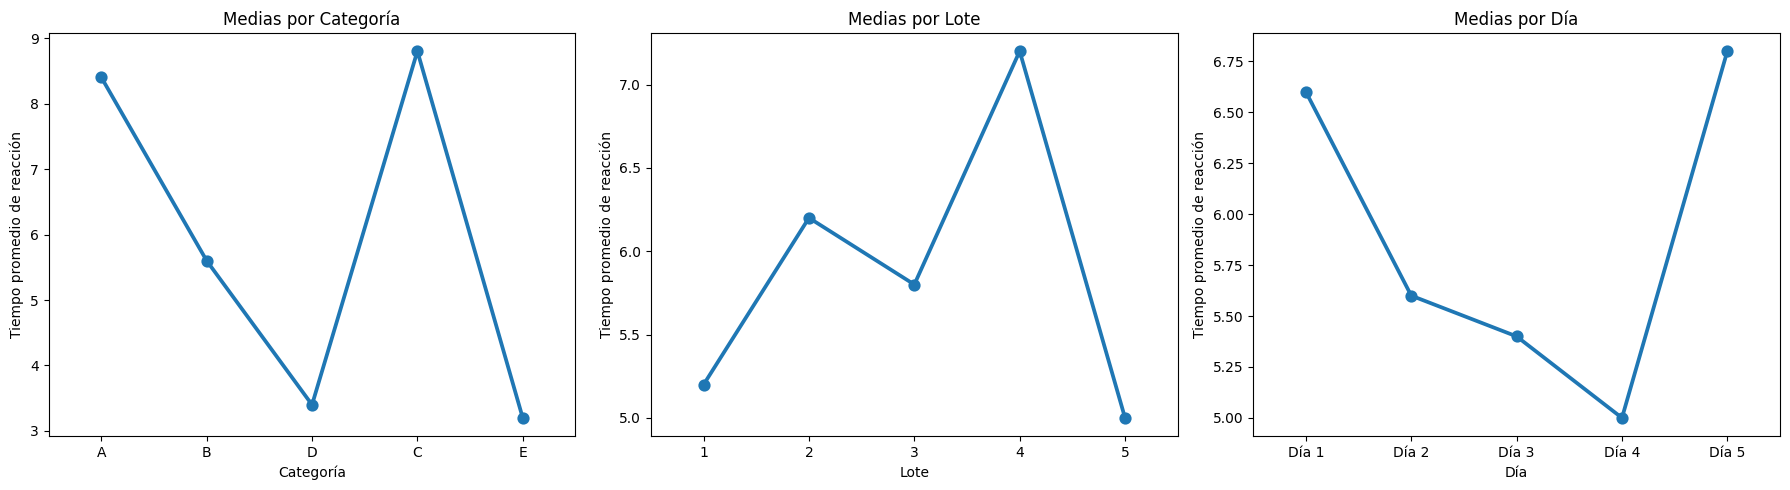

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de medias por tratamiento (Catalizador)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.pointplot(data=df, x="Categoría", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Categoría")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Lote
plt.subplot(1, 3, 2)
sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Lote")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Día
plt.subplot(1, 3, 3)
sns.pointplot(data=df, x="Día", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Día")
plt.ylabel("Tiempo promedio de reacción")

plt.tight_layout()
plt.show()
#BRIAN ALEXIS VILLALOBOS DE LOERA

# INTERPRETACION

Los catalizadores D y E son los más efectivos, ya que presentan los tiempos promedio de reacción más bajos. Esto coincide con los resultados del ANOVA y la prueba de Tukey. Además, se confirma que los lotes y días no tienen un efecto significativo en los resultados, lo que sugiere que el diseño experimental fue efectivo para controlar estas variables y aislar el efecto de los catalizadores. En resumen, los catalizadores D y E son los mejores opciones para acelerar el proceso químico.

# f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.

In [ ]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Categoría'] == 'A']['Valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'B']['Valor'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'C']['Valor'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'D']['Valor'], "Grupo D", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'E']['Valor'], "Grupo E", nivel_de_significancia)
#BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9609
Valor p: 0.8140
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9137
Valor p: 0.4899
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo E:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Categoría'] == 'A']['Valor'],
    df[df['Categoría'] == 'B']['Valor'],
    df[df['Categoría'] == 'C']['Valor'],
    df[df['Categoría'] == 'D']['Valor'],
    df[df['Categoría'] == 'E']['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 3.964568090461087
Valor p: 0.4108222744947537
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


# a) ¿Se justifica la eliminación?

Sí, tiene sentido eliminar el factor "día" del modelo porque su efecto no fue significativo en el ANOVA inicial (p > 0.4). Esto sugiere que las diferencias entre días no influyen de manera importante en el tiempo de reacción. Al eliminar este factor, se simplifica el modelo y se mejora la precisión de las estimaciones, permitiendo enfocarse en los factores relevantes como los catalizadores y el lote

# b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.

El diseño que se utiliza es un Diseño en Bloques Completos Aleatorizados

In [1]:
import pandas as pd
from io import StringIO

data = '''
Lote,Catalizador,Valor
1,A,8
1,B,7
1,D,1
1,C,7
1,E,3
2,C,11
2,E,2
2,A,7
2,D,3
2,B,8
3,B,4
3,A,9
3,C,10
3,E,1
3,D,5
4,D,6
4,C,8
4,E,6
4,B,6
4,A,10
5,E,4
5,D,2
5,B,3
5,A,8
5,C,8

'''

df = pd.read_csv(StringIO(data))
df

#BRIAN ALEXIS VILLALOBOS DE LOERA

,Lote,Catalizador,Valor
0,1,A,8
1,1,B,7
2,1,D,1
3,1,C,7
4,1,E,3
5,2,C,11
6,2,E,2
7,2,A,7
8,2,D,3
9,2,B,8


In [2]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Catalizador'    # La variable que no me interesa comparar
interes = 'Lote'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
                sum_sq    df          F    PR(>F)
C(Lote)          15.44   4.0   1.241158  0.333144
C(Catalizador)  141.44   4.0  11.369775  0.000146
Residual         49.76  16.0        NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


# HIPOTESIS

Las hipótesis planteadas son:

1. Tratamientos (catalizadores):
- Hipótesis nula: Todos los catalizadores tienen el mismo efecto sobre el tiempo de reacción.
- Hipótesis alternativa: Al menos un catalizador tiene un efecto diferente sobre el tiempo de reacción.
2. Bloques (lotes):
- Hipótesis nula: Los lotes no influyen en el tiempo de reacción.
- Hipótesis alternativa: Al menos un lote tiene un efecto distinto sobre el tiempo de reacción.

Estas hipótesis permiten evaluar si existen diferencias significativas entre los catalizadores y si los lotes afectan el tiempo de reacción.

# c) Pruebe las hipótesis y obtenga conclusiones.

# PUEBA DE HIPOTESIS
El análisis de varianza sin el factor "día" muestra que el efecto del catalizador es significativo, lo que indica que existen diferencias reales entre los tiempos de reacción producidos por cada catalizador. Por otro lado, el efecto del lote sigue siendo no significativo, lo que sugiere que las variaciones entre lotes no afectan el tiempo de reacción. En resumen, se confirma que el catalizador influye significativamente en el proceso, mientras que el lote no. La exclusión del factor "día" no cambia estas conclusiones.

# d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?

Al eliminar el factor "día", la varianza residual aumenta porque el modelo original absorbía parte de la variabilidad experimental a través de ese factor. Ahora, esa variabilidad se incorpora al error. Aunque esto es esperable, el modelo simplificado puede ser preferible por ser más fácil de interpretar y porque el factor "día" no era significativo. La simplicidad y claridad del modelo pueden valer más que la pequeña pérdida de precisión.

# e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?

Las conclusiones sobre las diferencias entre catalizadores son consistentes en ambos análisis porque el factor "día" no tiene un efecto significativo en el tiempo de reacción. Esto significa que eliminar el factor "día" no cambia las conclusiones sobre qué catalizadores son mejores, lo que refuerza la robustez de los resultados. La evidencia estadística sobre el efecto de los catalizadores se mantiene igual en ambos enfoques

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


# a) ¿Se justifica esta segunda eliminación en ambos problemas?

La eliminación del factor "lote" se justifica porque ni el día ni el lote fueron significativos en el análisis ANOVA. Al eliminar ambos factores de bloque, se simplifica el modelo sin perder información relevante, ya que no aportan a la explicación de la variabilidad en el tiempo de reacción. Esto permite enfocarse en los tratamientos (catalizadores) y obtener conclusiones más claras y directas sobre su efecto en el proceso.

# b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.

In [3]:
import pandas as pd
from io import StringIO

data = '''
Catalizador,Valor
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Catalizador,Valor
0,A,8
1,B,7
2,D,1
3,C,7
4,E,3
5,C,11
6,E,2
7,A,7
8,D,3
9,B,8


In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Catalizador'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")


Resultados del ANOVA:
                sum_sq    df          F    PR(>F)
C(Catalizador)  141.44   4.0  10.846626  0.000077
Residual         65.20  20.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.


# HIPOTESIS

Con el diseño completamente al azar, se evalúa si los tratamientos (catalizadores A, B, C, D o E) tienen un efecto diferente en el tiempo de reacción. Las hipótesis son:

- Hipótesis nula: Todos los catalizadores producen el mismo tiempo de reacción en promedio, y cualquier diferencia se debe al azar.
- Hipótesis alternativa: Al menos un catalizador tiene un efecto diferente, lo que indica que hay diferencias reales en los tiempos de reacción dependiendo del tipo de catalizador.

Estas hipótesis permiten determinar si los catalizadores tienen un efecto significativo en el tiempo de reacción, considerando solo la variabilidad debida al tratamiento y al error experimental.

# c) Pruebe las hipótesis y obtenga conclusiones.

El análisis ANOVA muestra un valor de F significativo (10.8466) y un valor de p muy bajo (0.000077), lo que indica que hay evidencia estadística fuerte para rechazar la hipótesis nula. Por lo tanto, se concluye que existen diferencias significativas en los tiempos de reacción entre al menos dos de los cinco catalizadores evaluados. Esto significa que el tipo de catalizador influye en el proceso químico y no todos tienen el mismo efecto sobre el tiempo de reacción.

# d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?

Al eliminar los factores de bloqueo (día y lote), el error residual aumentó porque la variabilidad asociada a estos factores ahora se incluye en el error. Esto reduce la precisión del modelo, ya que los bloques ayudaban a controlar y explicar parte de la variabilidad, lo que mejoraba la sensibilidad del análisis. Aunque el modelo es más simple, pierde capacidad para detectar efectos con tanta precisión.

# e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?

A pesar de simplificar el diseño al eliminar los bloques, las conclusiones sobre el efecto del catalizador se mantienen constantes. Esto se debe a que las diferencias entre los tratamientos son lo suficientemente grandes y consistentes como para ser detectadas incluso con más variabilidad en el modelo. La señal del efecto del tratamiento es más fuerte que el ruido adicional, lo que permite que los resultados sigan siendo significativos y se pueda identificar el efecto del catalizador de manera robusta.

# f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?

Si los factores de bloque hubieran sido significativos, eliminarlos habría afectado negativamente la precisión del análisis al aumentar el error residual y reducir la capacidad de detectar diferencias entre tratamientos. Al ignorar un bloque significativo, su efecto se mezcla con el error, lo que debilita el modelo y hace que los resultados sean menos confiables. En este caso, como los bloques no fueron significativos, la eliminación no afectó las conclusiones, pero si lo hubieran sido, podría haber llevado a resultados incorrectos.

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [5]:
data = '''
Inspector,Escala,Categoría,Valor
I,Escala 1,A,16
I,Escala 2,B,10
I,Escala 3,C,11
II,Escala 1,B,15
II,Escala 2,C,9
II,Escala 3,A,14
III,Escala 1,C,13
III,Escala 2,A,11
III,Escala 3,B,13
'''

df = pd.read_csv(StringIO(data))
df

,Inspector,Escala,Categoría,Valor
0,I,Escala 1,A,16
1,I,Escala 2,B,10
2,I,Escala 3,C,11
3,II,Escala 1,B,15
4,II,Escala 2,C,9
5,II,Escala 3,A,14
6,III,Escala 1,C,13
7,III,Escala 2,A,11
8,III,Escala 3,B,13


In [6]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA



Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


# a) ¿Hay diferencias entre los proveedores?

Si hay diferencias significativas entre los pesos entregados por los proveedores.

# b) ¿Hay diferencias entre los inspectores y entre las escalas?

Los resultados muestran que:

- No hay diferencia significativa entre los inspectores (p = 0.500), lo que indica que los resultados son consistentes independientemente de quién mida.
- Sí hay diferencia significativa entre las escalas (p = 0.0067), lo que sugiere que las escalas no están midiendo de manera consistente y podría haber un problema de calibración o precisión que necesita ser abordado.

# c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?

El proveedor A tuvo un promedio de 13.67 g, B de 12.67 g, y C de 11.00 g. El ideal es 15 g, por lo que el proveedor A es el más cercano al objetivo y el que mejor cumple con el requerimiento de peso.

# d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

In [7]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Escala'    # La variable que no me interesa comparar
interes = 'Categoría'      # La variable que me interesa comparar
respuesta = 'Valor' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


# ANALISIS

El análisis inicial mostró que el factor "inspector" no era significativo (p = 0.500), por lo que se eliminó para simplificar el modelo. El nuevo análisis de varianza con los factores "proveedor" y "escala" reveló que ambos son altamente significativos:

- Proveedor (p = 0.001538): Hay diferencias estadísticas importantes entre los proveedores, lo que sugiere que el peso del material varía según el proveedor.
- Escala (p = 0.000178): Las básculas introducen diferencias significativas en los valores registrados, posiblemente debido a problemas de calibración o precisión.

La eliminación del factor no significativo mejoró la precisión del modelo. Se concluye que el proveedor y la escala influyen en las mediciones, y se recomienda revisar las escalas para reducir errores. Además, el proveedor A parece ser el más adecuado debido a su cercanía al valor objetivo de 15 gramos.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [8]:
import pandas as pd
from io import StringIO

data = '''
Columna,Renglon,Variedad_de_Maiz,Valor
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660

'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Columna,Renglon,Variedad_de_Maiz,Valor
0,1,1,B,1.640
1,1,2,D,1.210
2,1,3,C,1.425
3,1,4,A,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Columna'   # Primer bloque (factor no principal)
bloque_2 = 'Renglon'      # Segundo bloque (factor no principal)
interes = 'Variedad_de_Maiz'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
#BRIAN ALEXIS VILLAOBOS DE LOERA

Resultados del ANOVA para el Cuadro Latino:
                       sum_sq   df          F    PR(>F)
C(Variedad_de_Maiz)  0.426842  3.0   6.587865  0.025092
C(Columna)           0.030155  3.0   0.465406  0.716972
C(Renglon)           0.827342  3.0  12.769166  0.005148
Residual             0.129584  6.0        NaN       NaN

Conclusión: Hay diferencias significativas: Variedad_de_Maiz.
Conclusión: No hay diferencias significativas: Columna.
Conclusión: Hay diferencias significativas: Renglon.


# a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?

Sí, hay diferencias entre las variedades de maíz.

# b) ¿Cuál de los factores de bloque tuvo efectos?

El análisis muestra que:

- El factor "renglón" tiene un efecto significativo (p = 0.005), lo que sugiere que las diferencias en el rendimiento dependen de la posición vertical de las parcelas en el campo, posiblemente debido a efectos de cultivos anteriores o residuos en el suelo.
- El factor "columna" no tiene un efecto significativo (p = 0.717), lo que indica que la posición horizontal de las parcelas no influyó de manera importante en los resultados, descartando un posible gradiente de fertilidad en esa dirección

# c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?

Es probable que un diseño completamente al azar no hubiera detectado las mismas diferencias entre variedades porque no considera los efectos de los renglones, que sí influyen en el rendimiento. Al ignorar estos efectos, el error experimental aumentaría, lo que dificultaría la detección de diferencias reales entre las variedades. El diseño en cuadrícula latina, al controlar el efecto de los renglones, permitió una mayor precisión en la detección de diferencias significativas.

# d) ¿Y con un diseño en bloques completos al azar?

Es cierto, un diseño de bloques completamente al azar (DBCA) podría haber ayudado a reducir el error al bloquear por renglón, pero no habría controlado el efecto de las columnas. En cambio, el diseño en cuadro latino permite bloquear dos fuentes de variación simultáneamente (renglones y columnas), lo que proporciona un control más completo y preciso sobre la variabilidad experimental. Esto hace que el cuadro latino sea más adecuado para este experimento, donde se identificó un efecto significativo de los renglones.

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [10]:
import pandas as pd
from io import StringIO

data = '''
Apetito,Peso_inicial,Dieta,Valor
P1,A1,C,67
P1,A2,A,105
P1,A3,B,95
P1,A1,A,72
P1,A2,B,112
P1,A3,C,86
P2,A1,A,85
P2,A2,B,75
P2,A3,C,88
P2,A1,B,98
P2,A2,C,110
P3,A1,B,66
P3,A2,C,68
P3,A3,A,108
P3,A1,C,47
P3,A2,A,91
P3,A3,B,120
'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Apetito,Peso_inicial,Dieta,Valor
0,P1,A1,C,67
1,P1,A2,A,105
2,P1,A3,B,95
3,P1,A1,A,72
4,P1,A2,B,112
5,P1,A3,C,86
6,P2,A1,A,85
7,P2,A2,B,75
8,P2,A3,C,88
9,P2,A1,B,98


In [11]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Apetito'   # Primer bloque (factor no principal)
bloque_2 = 'Peso_inicial'      # Segundo bloque (factor no principal)
interes = 'Dieta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA para el Cuadro Latino:
                      sum_sq    df         F    PR(>F)
C(Dieta)         1162.627040   2.0  2.192871  0.162308
C(Apetito)        365.203963   2.0  0.688824  0.524490
C(Peso_inicial)  2527.370629   2.0  4.766961  0.035160
Residual         2650.924242  10.0       NaN       NaN

Conclusión: No hay diferencias significativas: Dieta.
Conclusión: No hay diferencias significativas: Apetito.
Conclusión: Hay diferencias significativas: Peso_inicial.


# a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?

Según el análisis de varianza (ANOVA), el único factor que tiene un efecto estadísticamente significativo sobre el peso ganado es el peso inicial de las ratas (p = 0.035). Esto indica que el peso inicial influye en la cantidad de peso ganado durante el experimento. Por otro lado, la dieta (p = 0.162) y el apetito (p = 0.524) no mostraron efectos estadísticamente significativos.


# b) ¿Cuál dieta es mejor?
Aunque el análisis no mostró diferencias significativas entre las dietas, se pueden observar los valores promedio de peso ganado para cada dieta. Sin embargo, no se puede concluir con confianza estadística que alguna dieta sea mejor que otra, ya que la variabilidad y el tamaño de la muestra no permiten afirmar que las diferencias observadas sean reales.



# c) ¿Alguno de los factores de bloque puede ser ignorado?

El factor apetito puede considerarse prescindible porque no mostró influencia significativa sobre el peso ganado (p = 0.524). Ignorar este factor podría simplificar el análisis sin perder precisión. En contraste, el peso inicial tiene un efecto significativo (p = 0.035) y no debe ser ignorado.


# d) Análisis simplificado ignorando el factor apetito

Al ignorar el factor apetito, el análisis se simplifica considerando solo la dieta y el peso inicial como factores. Es probable que el peso inicial continúe mostrando un efecto significativo, mientras que la dieta probablemente seguirá sin mostrar diferencias claras entre tratamientos. Se podría concluir que las dietas A, B y C no causan diferencias significativas en la ganancia de peso cuando se controla el peso inicial. La variabilidad en el peso inicial de las ratas explica más la ganancia de peso que las dietas probadas.

In [12]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Dieta'] == 'A']['Valor'], 'Dieta A', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'B']['Valor'], 'Dieta B', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'C']['Valor'], 'Dieta C', nivel_de_significancia)




Prueba de Shapiro-Wilk para Dieta A:
Estadístico: 0.9451
Valor p: 0.7024
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta B:
Estadístico: 0.9525
Valor p: 0.7601
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta C:
Estadístico: 0.9720
Valor p: 0.9059
Interpretación: Los datos tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Dieta'] == 'A']['Valor'],
    df[df['Dieta'] == 'B']['Valor'],
    df[df['Dieta'] == 'C']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [13]:
import pandas as pd
from io import StringIO

data = '''
Chofer,Día,Ruta,Marca,Valor
Carlos,Lunes,D,α,825
Carlos,Martes,C,χ,585
Carlos,Miércoles,B,β,550
Carlos,Jueves,A,δ,580
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,α,580
Carlos,Jueves,A,χ,650
Enrique,Lunes,A,χ,650
Enrique,Martes,B,α,540
Enrique,Miércoles,C,χ,580
Enrique,Jueves,D,β,850
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,700
Genaro,Martes,D,δ,650
Genaro,Miércoles,A,α,635
Genaro,Jueves,B,χ,450
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,β,540
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,475
Luis,Martes,A,β,560
Luis,Miércoles,D,α,650
Luis,Jueves,C,α,670
Luis,Lunes,B,δ,480
Luis,Martes,A,β,615
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,730

'''

df = pd.read_csv(StringIO(data))
df
#BRIAN ALEXIS VILLALOBOS DE LOERA

,Chofer,Día,Ruta,Marca,Valor
0,Carlos,Lunes,D,α,825
1,Carlos,Martes,C,χ,585
2,Carlos,Miércoles,B,β,550
3,Carlos,Jueves,A,δ,580
4,Carlos,Lunes,D,α,750
5,Carlos,Martes,C,χ,610
6,Carlos,Miércoles,B,α,580
7,Carlos,Jueves,A,χ,650
8,Enrique,Lunes,A,χ,650
9,Enrique,Martes,B,α,540


In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Día'   # Primer bloque (factor no principal)
bloque_2 = 'Chofer'      # Segundo bloque (factor no principal)
bloque_3 = 'Marca'      # Tercer bloque (factor no principal)
interes = 'Ruta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
#BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA para el Cuadro Latino:
                  sum_sq    df          F        PR(>F)
C(Ruta)    170784.399669   3.0  25.300500  7.560096e-07
C(Día)      25681.264327   3.0   3.804498  2.724348e-02
C(Chofer)   13126.136055   3.0   1.944544  1.566818e-01
C(Marca)    23096.929435   3.0   3.421647  3.824435e-02
Residual    42751.508065  19.0        NaN           NaN

Conclusión: Hay diferencias significativas: Ruta.
Conclusión: Hay diferencias significativas: Día.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: Hay diferencias significativas: Marca.


# a) Haga el análisis de varianza de este experimento

Según el análisis de varianza (ANOVA), los factores que influyen significativamente en los costos de distribución son:

- La ruta: Los costos varían dependiendo de la ruta elegida.
- El día: Los costos varían según el día de la semana en que se hace la distribución.
- La marca del vehículo: Los costos varían dependiendo de la marca del vehículo utilizado.

Por otro lado, el factor "chofer" no tiene un efecto significativo, lo que indica que no hay diferencias importantes entre los choferes en cuanto al costo de distribución.

# b) Realice las pruebas de comparaciones múltiples para los factores significativos.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -176.9789 -15.5211   True
     A      C    28.75 0.7661  -51.9789 109.4789  False
     A      D  125.625 0.0012   44.8961 206.3539   True
     B      C    125.0 0.0012   44.2711 205.7289   True
     B      D  221.875    0.0  141.1461 302.6039   True
     C      D   96.875 0.0141   16.1461 177.6039   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

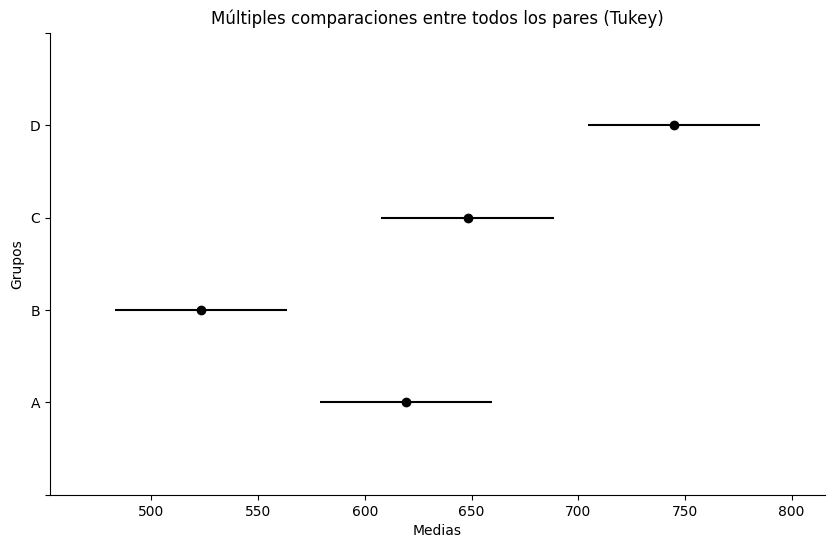

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#BRIAN ALEXIS VILLALOBOS DE LOERA

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
Jueves     Lunes     3.75 0.9998 -132.5788 140.0788  False
Jueves    Martes   -48.75 0.7639 -185.0788  87.5788  False
Jueves Miércoles  -44.375 0.8107 -180.7038  91.9538  False
 Lunes    Martes    -52.5 0.7211 -188.8288  83.8288  False
 Lunes Miércoles  -48.125 0.7708 -184.4538  88.2038  False
Martes Miércoles    4.375 0.9998 -131.9538 140.7038  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

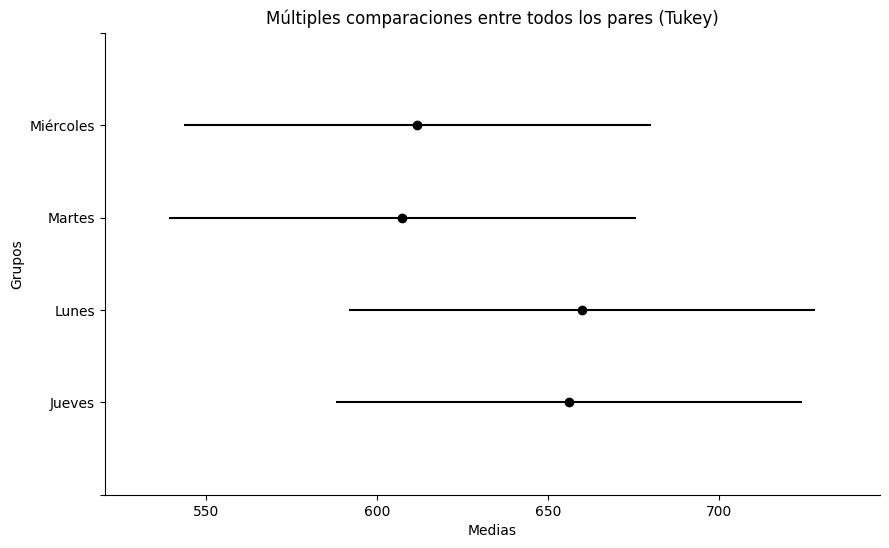

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Día'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β     -9.0 0.9973 -134.5149 116.5149  False
     α      δ    -81.5 0.4308 -226.4321  63.4321  False
     α      χ -62.6111 0.5062 -184.1904  58.9682  False
     β      δ    -72.5 0.5631 -223.3501  78.3501  False
     β      χ -53.6111 0.6694 -182.1878  74.9656  False
     δ      χ  18.8889  0.985 -128.7027 166.4805  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

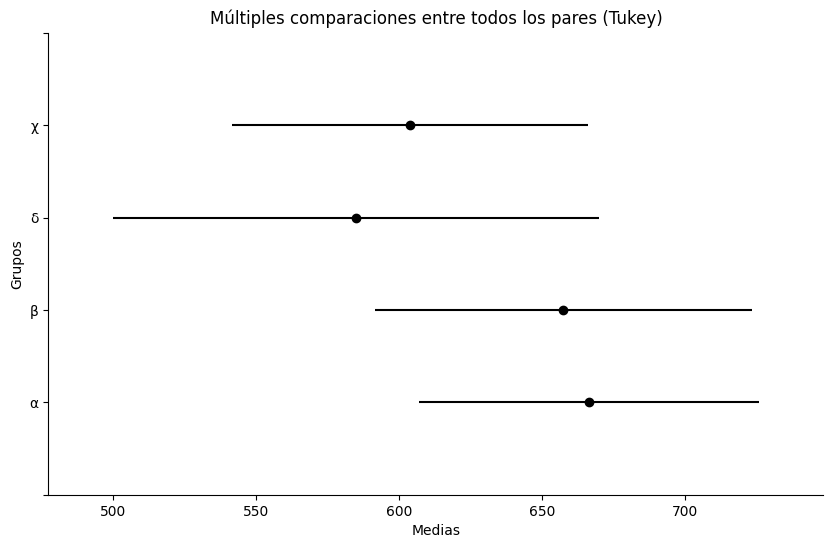

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

# c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.

In [21]:
# Gráficos de medias por factor
plt.figure(figsize=(10,6))
sns.barplot(x='Ruta', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Ruta')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [22]:
import pandas as pd
from io import StringIO

data = '''
Vaca,Periodo,Lisina,Proteina,Leche
1,1,0.0,2,304
1,2,0.1,10,436
1,3,0.2,4,350
1,4,0.3,12,504
1,5,0.4,6,417
1,6,0.5,14,519
1,7,0.6,8,432
2,1,0.1,4,381
2,2,0.2,12,505
2,3,0.3,6,425
2,4,0.4,14,564
2,5,0.5,2,487
2,6,0.6,10,536
2,7,0.0,6,483
3,1,0.2,6,432
3,2,0.3,14,566
3,3,0.4,10,479
3,4,0.5,2,357
3,5,0.6,4,466
3,6,0.0,12,465
3,7,0.1,14,507
4,1,0.3,8,442
4,2,0.4,6,372
4,3,0.5,10,536
4,4,0.6,4,366
4,5,0.0,6,495
4,6,0.1,12,425
4,7,0.2,14,507
5,1,0.4,10,496
5,2,0.5,4,449
5,3,0.6,12,493
5,4,0.0,6,345
5,5,0.1,14,509
5,6,0.2,8,481
5,7,0.3,2,380
6,1,0.5,12,534
6,2,0.6,6,421
6,3,0.0,14,352
6,4,0.1,8,427
6,5,0.2,6,346
6,6,0.3,10,478
6,7,0.4,4,397
7,1,0.6,14,543
7,2,0.0,8,386
7,3,0.1,2,435
7,4,0.2,10,485
7,5,0.3,12,406
7,6,0.4,12,554
7,7,0.5,6,410

'''

df = pd.read_csv(StringIO(data))
df

,Vaca,Periodo,Lisina,Proteina,Leche
0,1,1,0.0,2,304
1,1,2,0.1,10,436
2,1,3,0.2,4,350
3,1,4,0.3,12,504
4,1,5,0.4,6,417
5,1,6,0.5,14,519
6,1,7,0.6,8,432
7,2,1,0.1,4,381
8,2,2,0.2,12,505
9,2,3,0.3,6,425


In [23]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Periodo'   # Primer bloque (factor no principal)
bloque_2 = 'Vaca'      # Segundo bloque (factor no principal)
bloque_3 = 'Lisina'      # Tercer bloque (factor no principal)
interes = 'Proteina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
    #BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA para el Cuadro Latino:
                   sum_sq    df         F    PR(>F)
C(Proteina)  81658.082957   6.0  4.694560  0.002717
C(Periodo)    4518.955264   6.0  0.259797  0.950234
C(Vaca)      22265.466411   6.0  1.280052  0.303492
C(Lisina)    19815.528269   6.0  1.139204  0.370349
Residual     69576.774186  24.0       NaN       NaN

Conclusión: Hay diferencias significativas: Proteina.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Lisina.
